In [1]:
import seaborn as sns
import pandas as pd

In [2]:
#讓jupyterlab 顯示區域能大一些
#通常用於視覺化分析

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = "{:,.2f}".format

In [3]:
#將資料引入
#請注意: 資料與程式在同一個目錄
sales=pd.read_excel('sales.xlsx')

In [4]:
#顯示2筆資料
sales.head(2)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,"10,123.02",0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02


### relplot

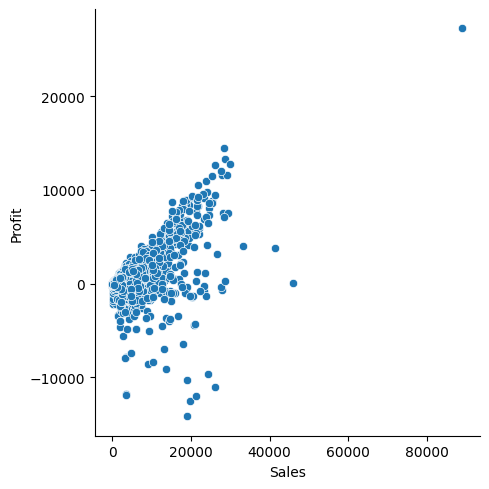

In [5]:
#比較兩兩變數
sns.relplot(x='Sales',y='Profit',data=sales)

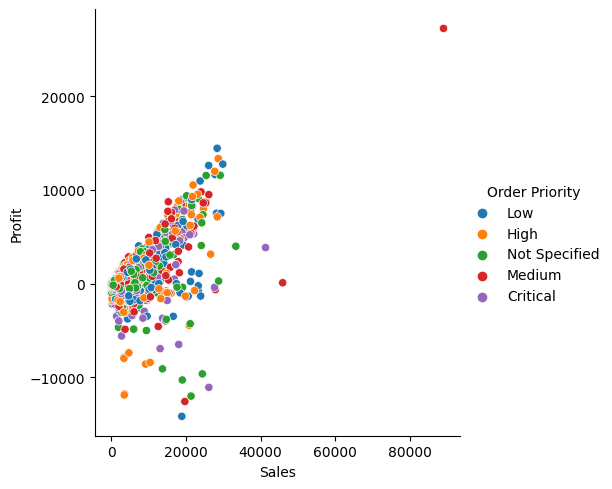

In [6]:
sns.relplot(x='Sales',y='Profit',data=sales,hue='Order Priority')

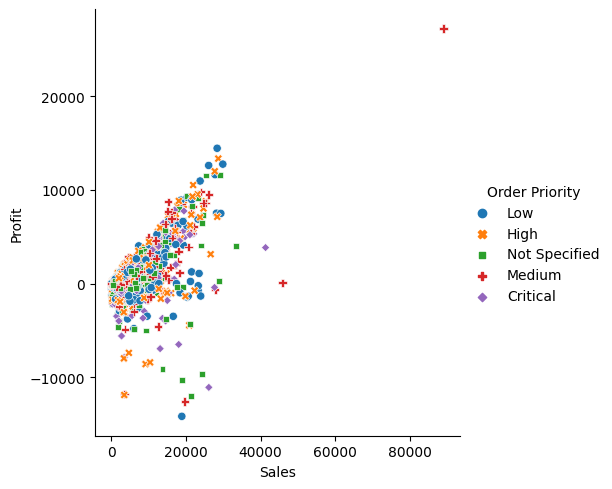

In [7]:
sns.relplot(x='Sales',y='Profit',data=sales,hue='Order Priority',style='Order Priority')

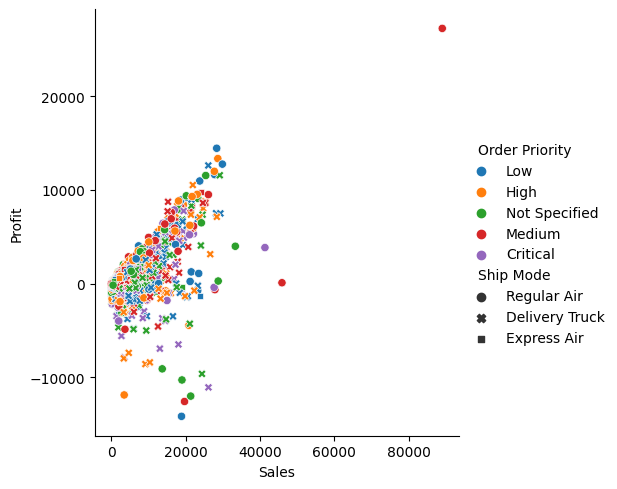

In [8]:
sns.relplot(x='Sales',y='Profit',data=sales,hue='Order Priority',style='Ship Mode')

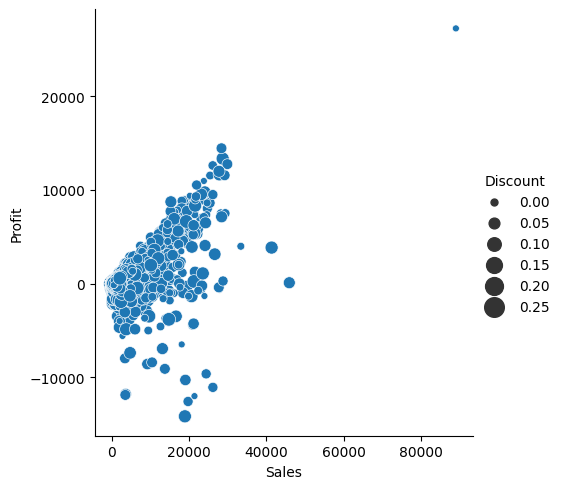

In [9]:
sns.relplot(x='Sales',y='Profit',data=sales,size='Discount',sizes=(25,200))

In [10]:
#取出日期型態欄位，建立一個新欄位，稱為year
sales['year']=sales['Order Date'].dt.year 

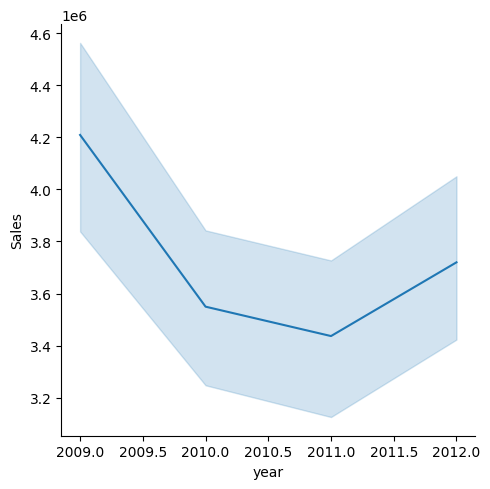

In [11]:
#actual value
sns.relplot(x='year',y='Sales',data=sales,kind='line',estimator=sum)

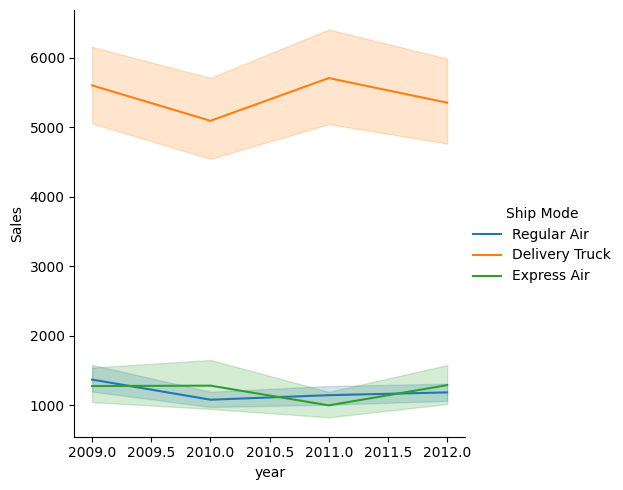

In [12]:
sns.relplot(x='year',y='Sales',data=sales,kind='line',hue='Ship Mode')

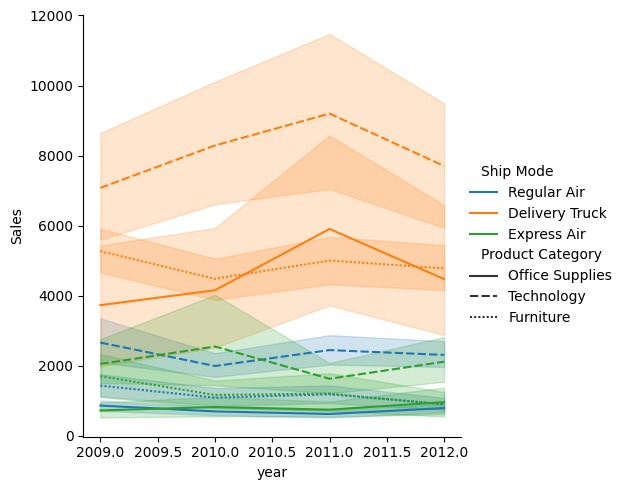

In [13]:
#是否顯示信賴區間
sns.relplot(x='year',y='Sales',data=sales,kind='line',hue='Ship Mode',style='Product Category')
#sns.relplot('year','Sales',data=sales,kind='line',hue='Ship Mode',style='Product Category',ci=None)

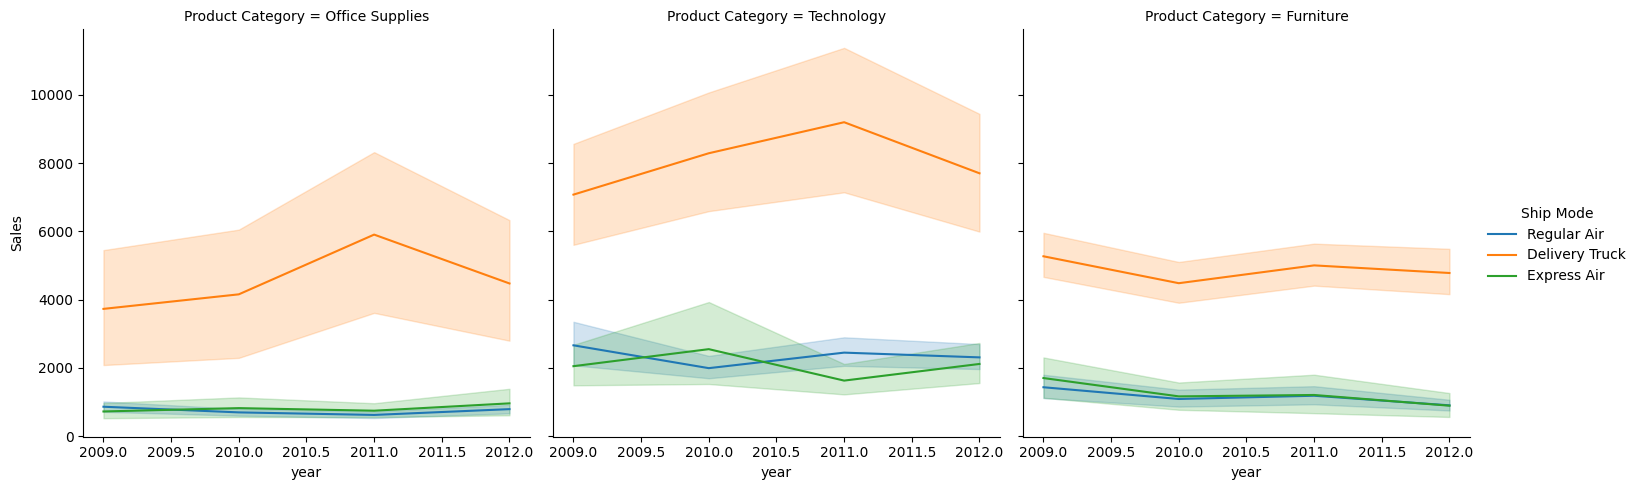

In [14]:
#限制以col為Product Category方式顯示圖表
#通常用於圖表跟圖表比較
sns.relplot(x='year',y='Sales',data=sales,kind='line',hue='Ship Mode',col='Product Category')

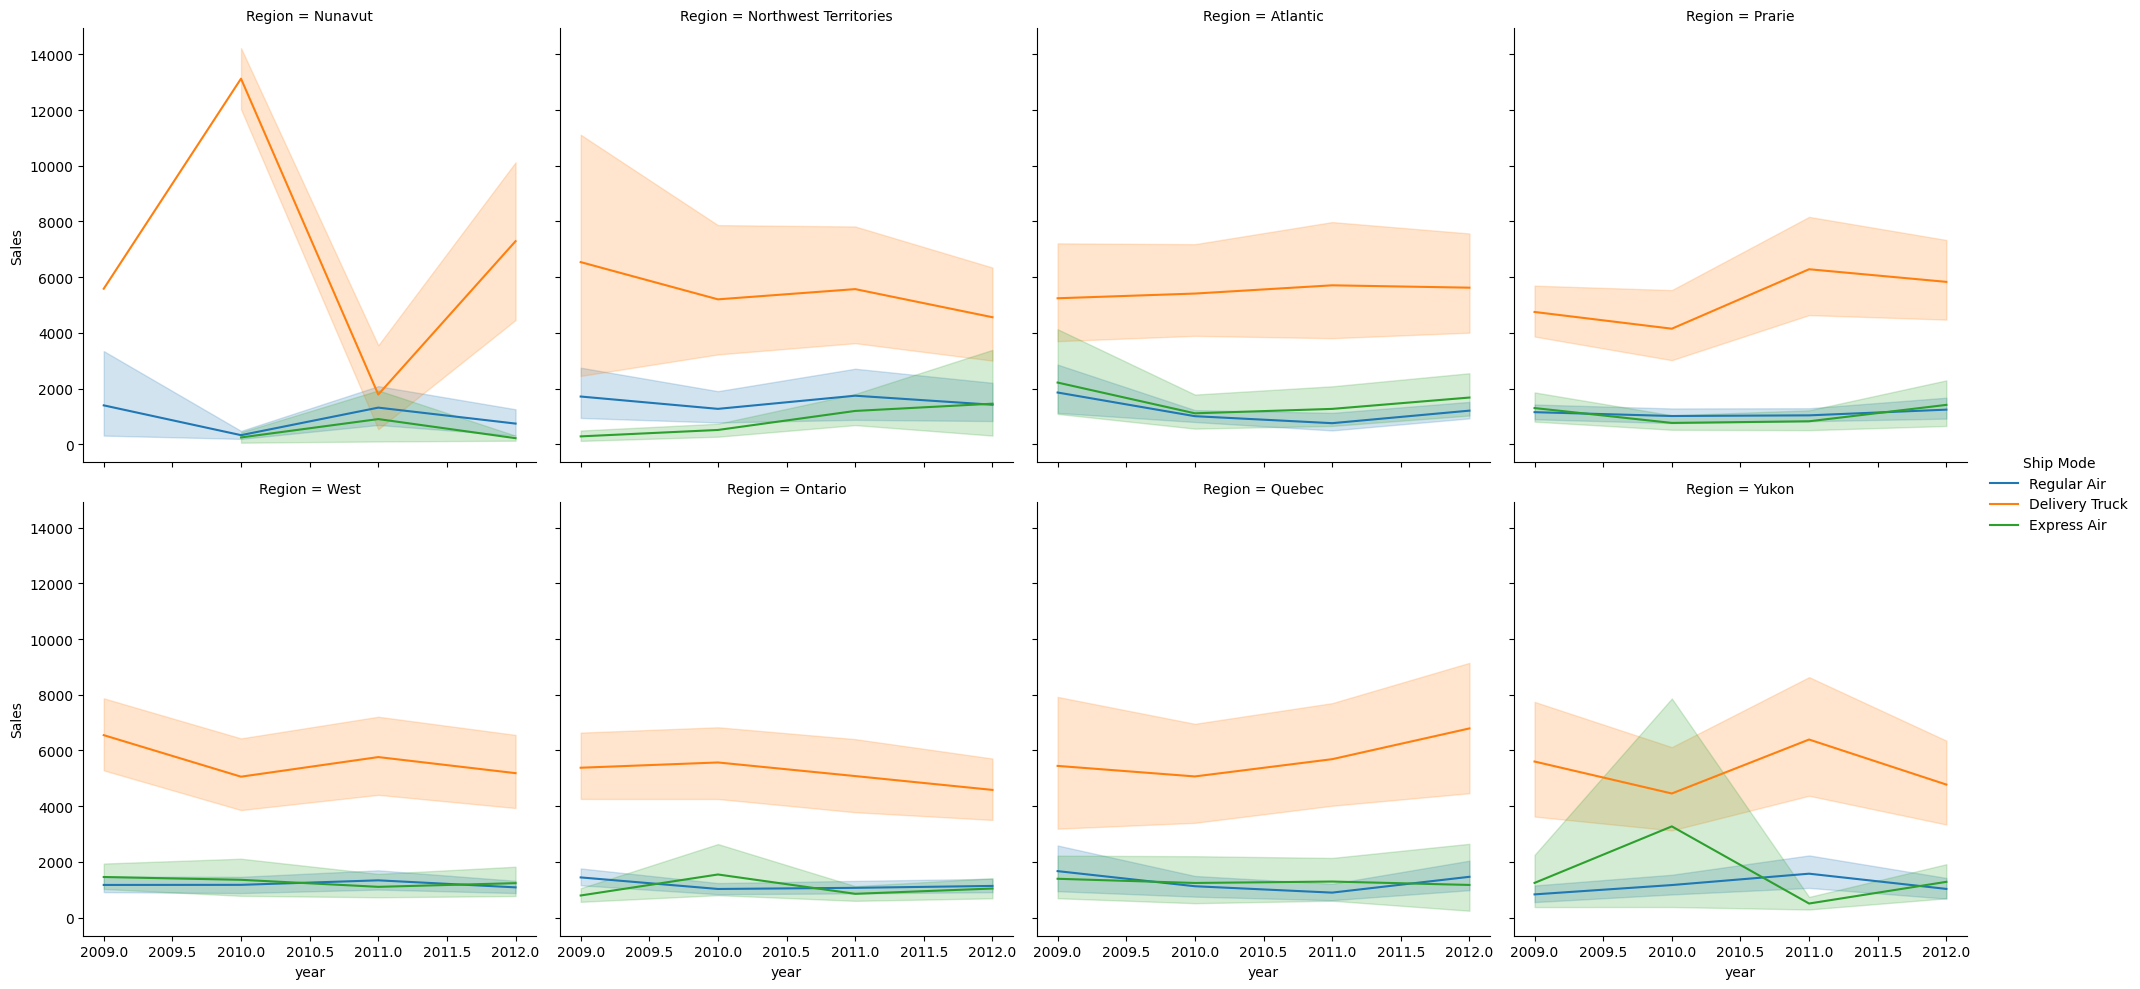

In [15]:
#限制以col為Region方式顯示圖表
#一行顯示4個圖表
sns.relplot(x='year',y='Sales',data=sales,kind='line',hue='Ship Mode',col='Region',col_wrap=4)

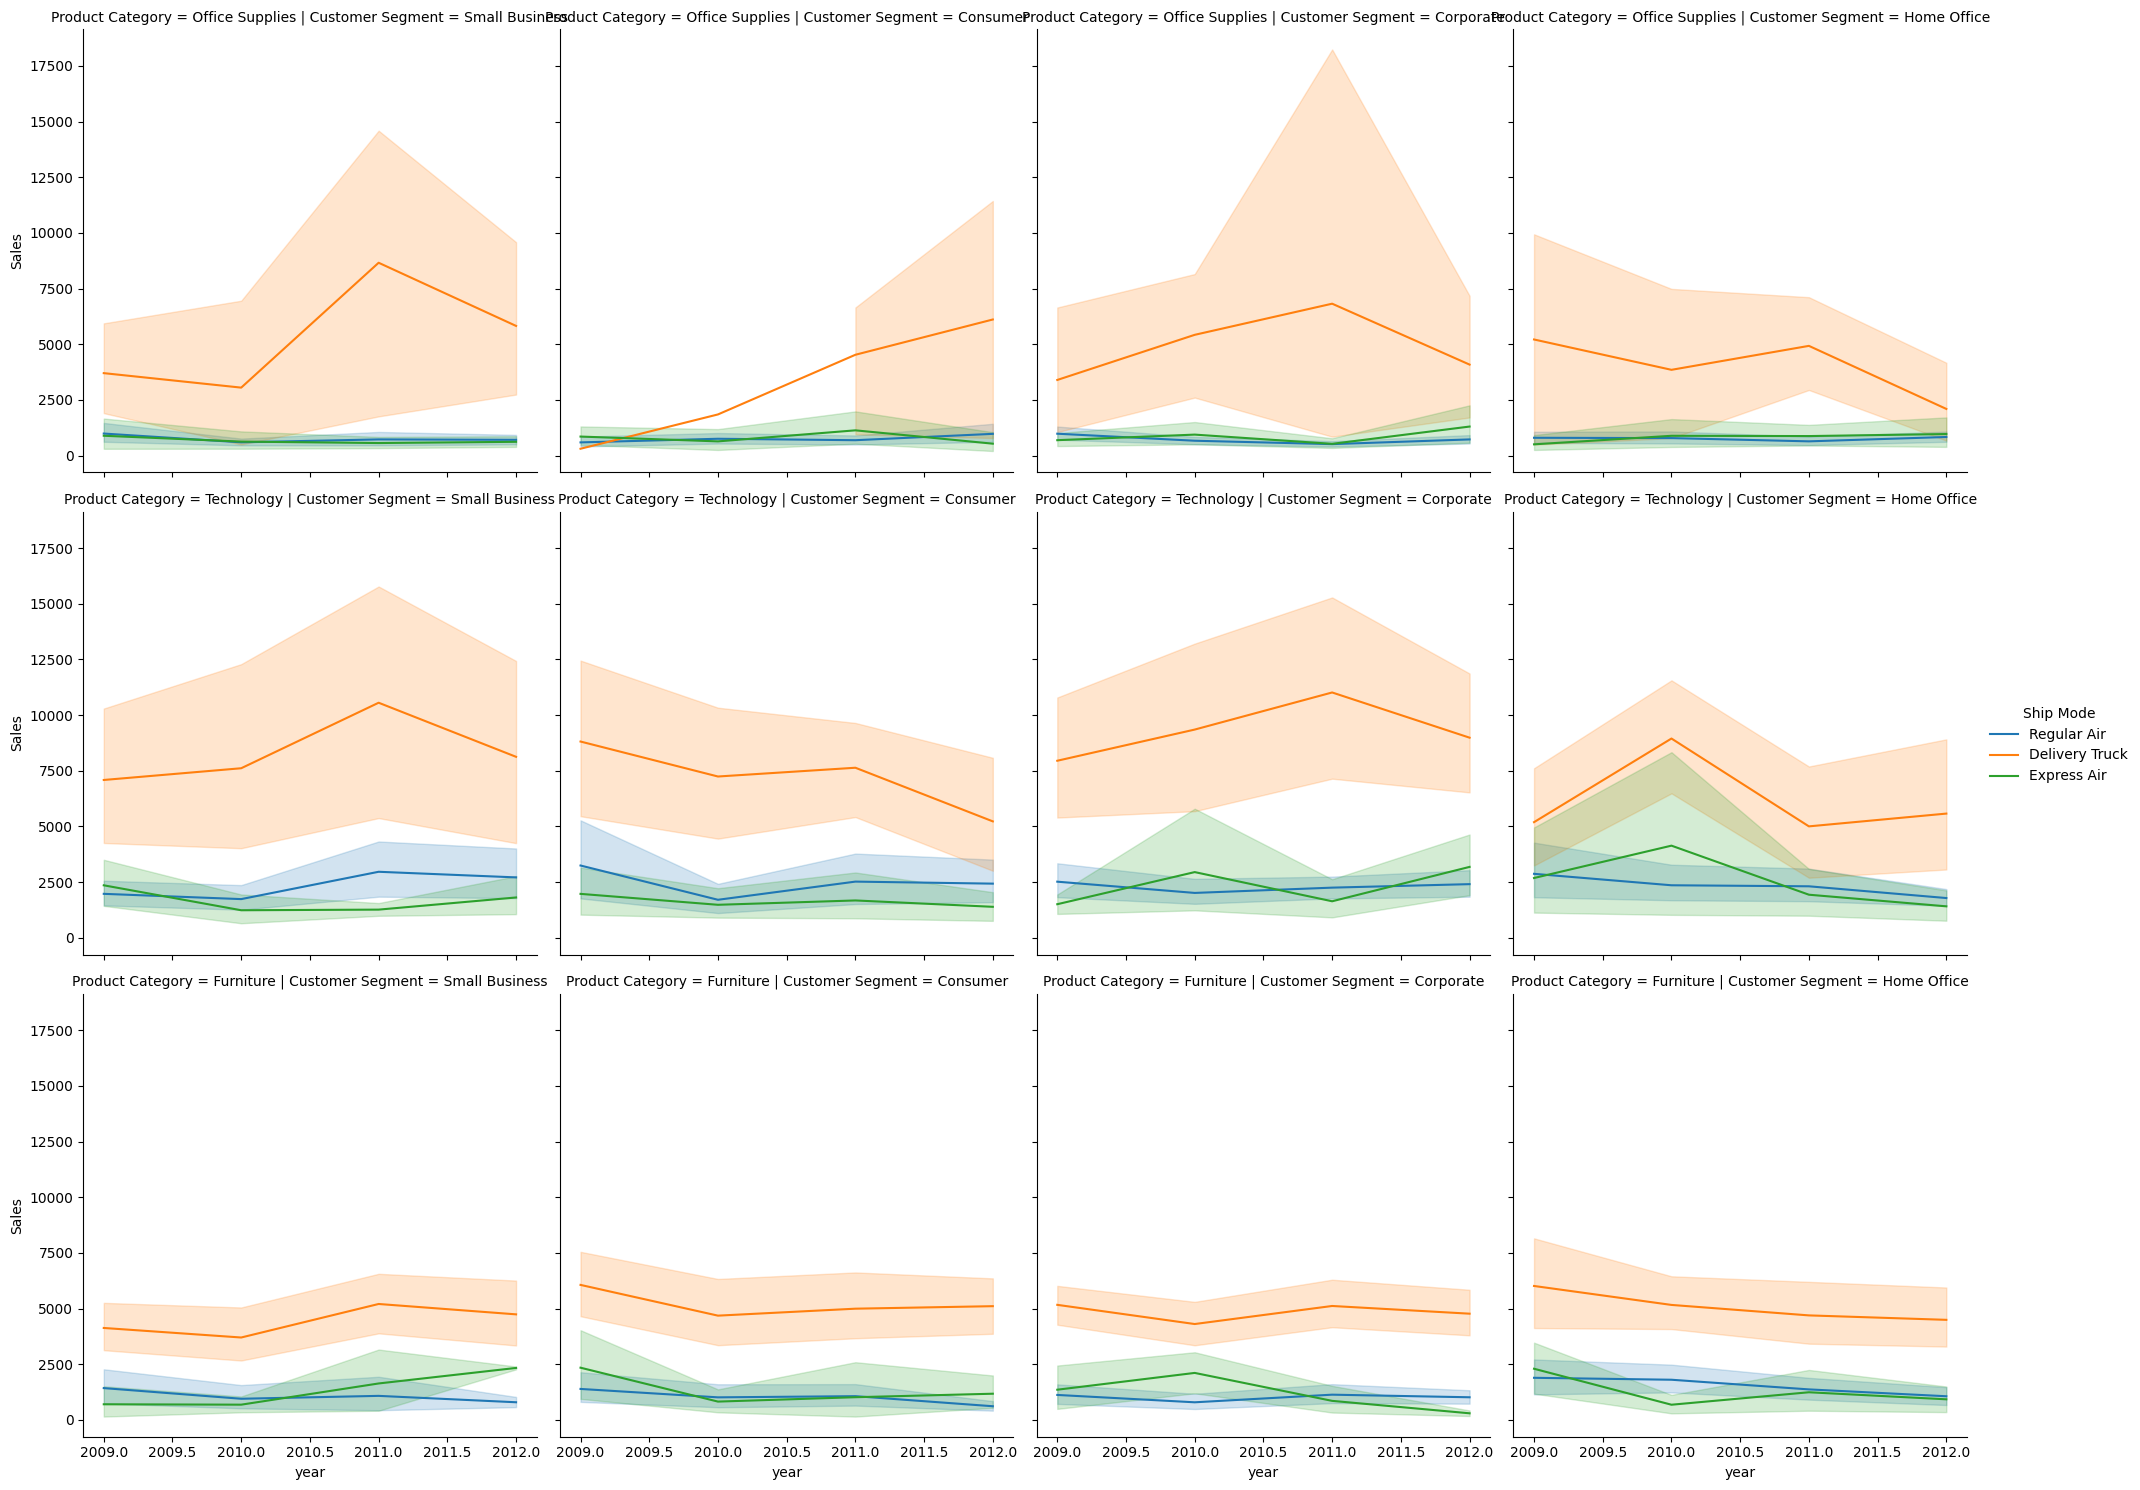

In [16]:
#限制以col為Customer Segment方式顯示圖表
#限制以row為Product Category方式顯示圖表
sns.relplot(x='year',y='Sales',data=sales,kind='line',hue='Ship Mode',col='Customer Segment',row='Product Category')

### countplot

<AxesSubplot: xlabel='year', ylabel='count'>

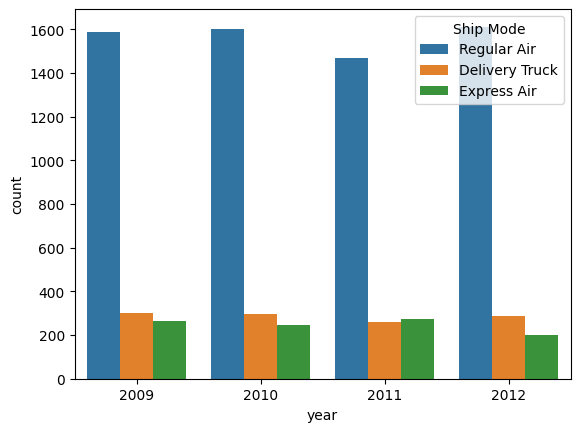

In [17]:
#用來計算筆數
sns.countplot(x='year',hue="Ship Mode",data=sales)

### catplot

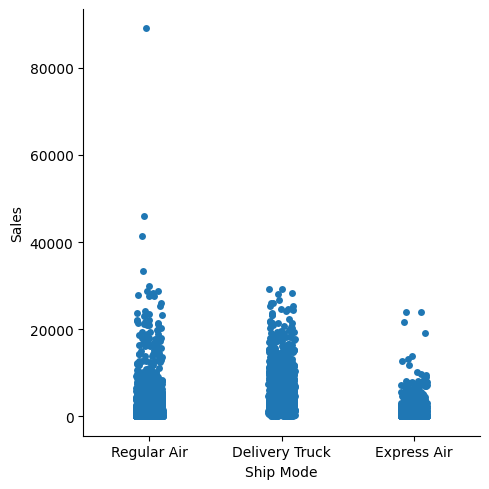

In [18]:
sns.catplot(x="Ship Mode",y="Sales",data=sales)

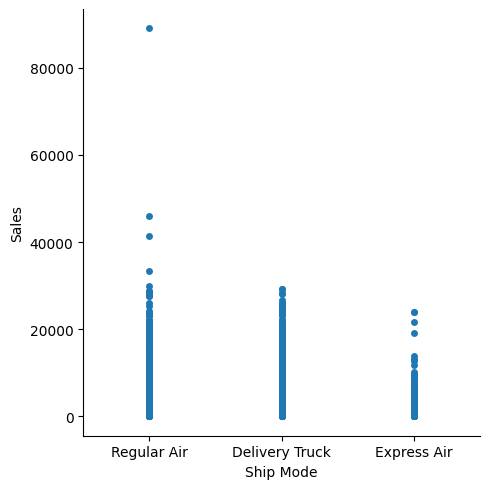

In [19]:
#jitter: 用一條線顯示
sns.catplot(x="Ship Mode",y="Sales",data=sales,jitter=False)

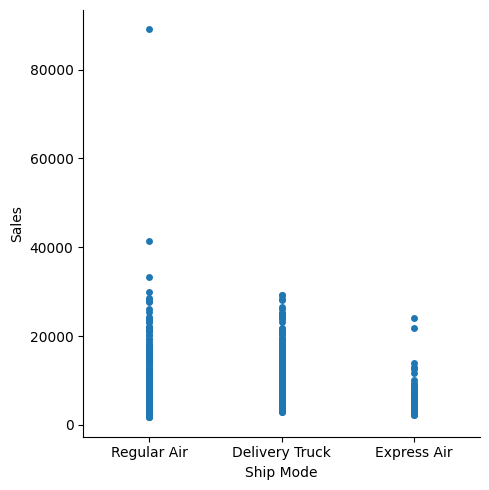

In [20]:
#這種方式常用，可以依照資料探索的想法進行視覺化分析
#設定條件判斷
sns.catplot(x="Ship Mode",y="Sales",data=sales.query("Profit>1000"),jitter=False)

C:\Users\orozc\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3543: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\orozc\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3543: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\Users\orozc\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3543: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\orozc\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3543: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\orozc\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3543: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


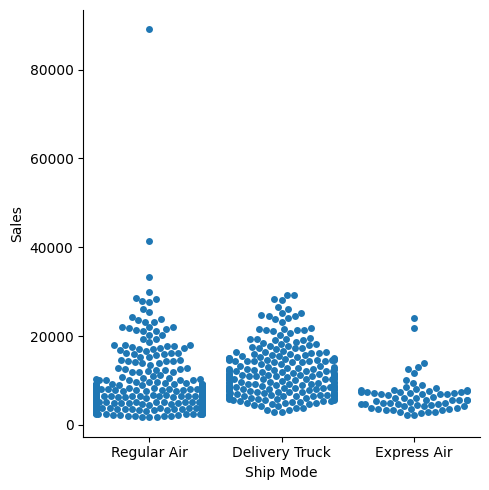

In [21]:
#用swarm方式顯示資料
sns.catplot(x="Ship Mode",y="Sales",data=sales.query("Profit>1000"),kind="swarm")

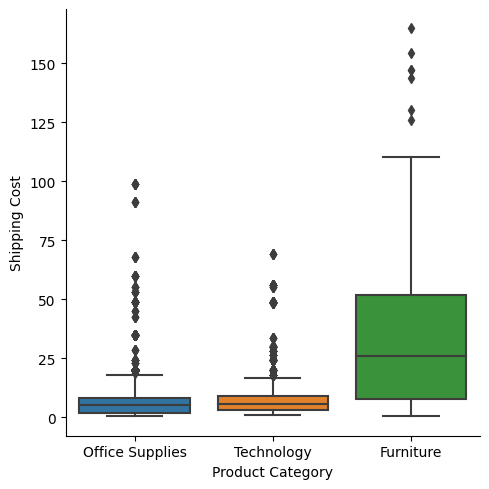

In [22]:
#用盒鬚圖方式顯示資料
sns.catplot(x="Product Category",y="Shipping Cost",data=sales,kind="box")

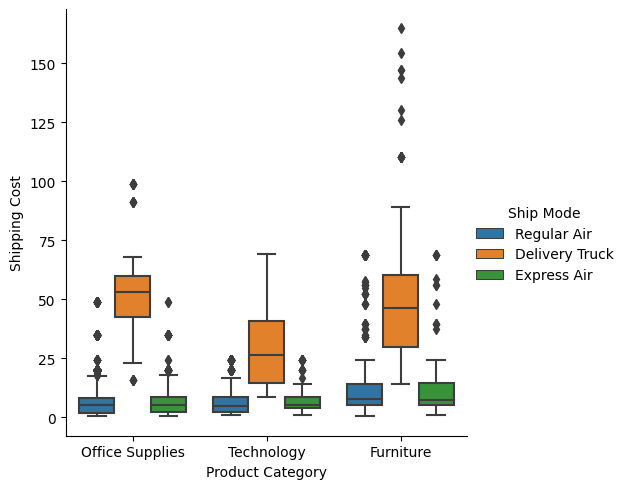

In [23]:
#依照Ship Mode進行多個盒鬚圖顯示
sns.catplot(x="Product Category",y="Shipping Cost",hue="Ship Mode",data=sales,kind="box")

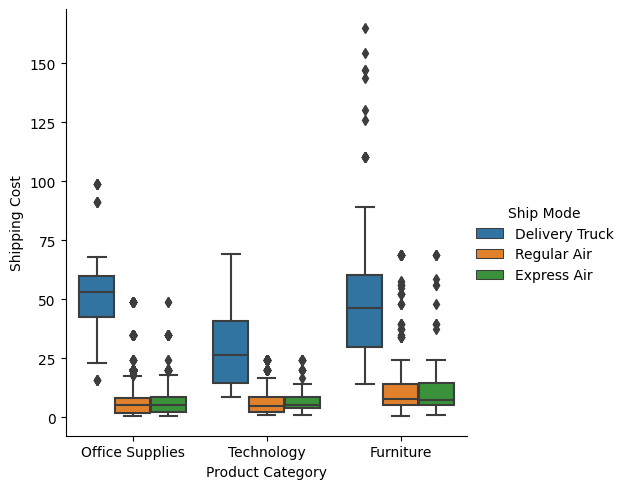

In [24]:
#依照自訂順序顯示
sns.catplot(x="Product Category",y="Shipping Cost",hue="Ship Mode",hue_order=["Delivery Truck","Regular Air","Express Air"],data=sales,kind="box")

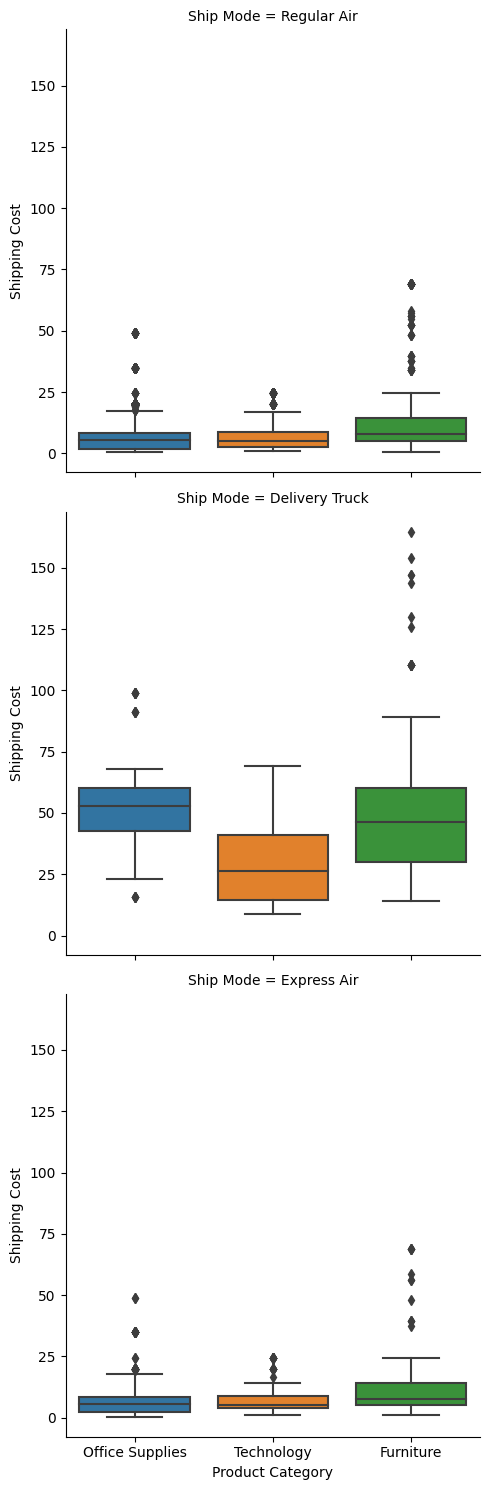

In [25]:
#利用row的方式進行個別顯示
sns.catplot(x="Product Category",y="Shipping Cost",row="Ship Mode",data=sales,kind="box")

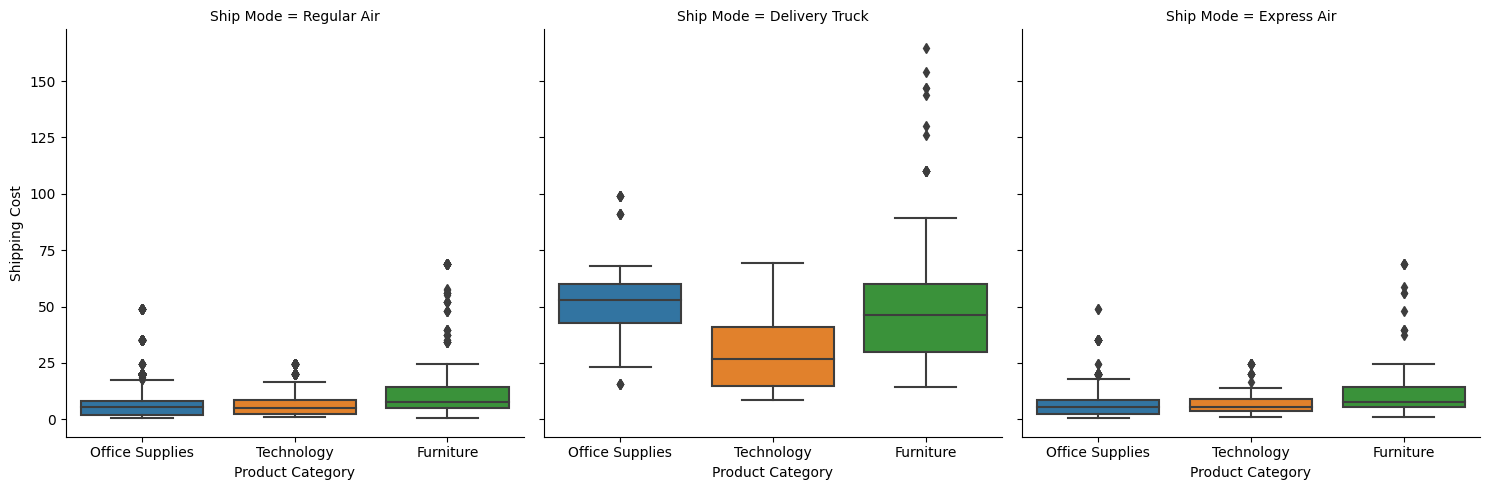

In [26]:
#利用col的方式進行個別顯示
sns.catplot(x="Product Category",y="Shipping Cost",col="Ship Mode",data=sales,kind="box")

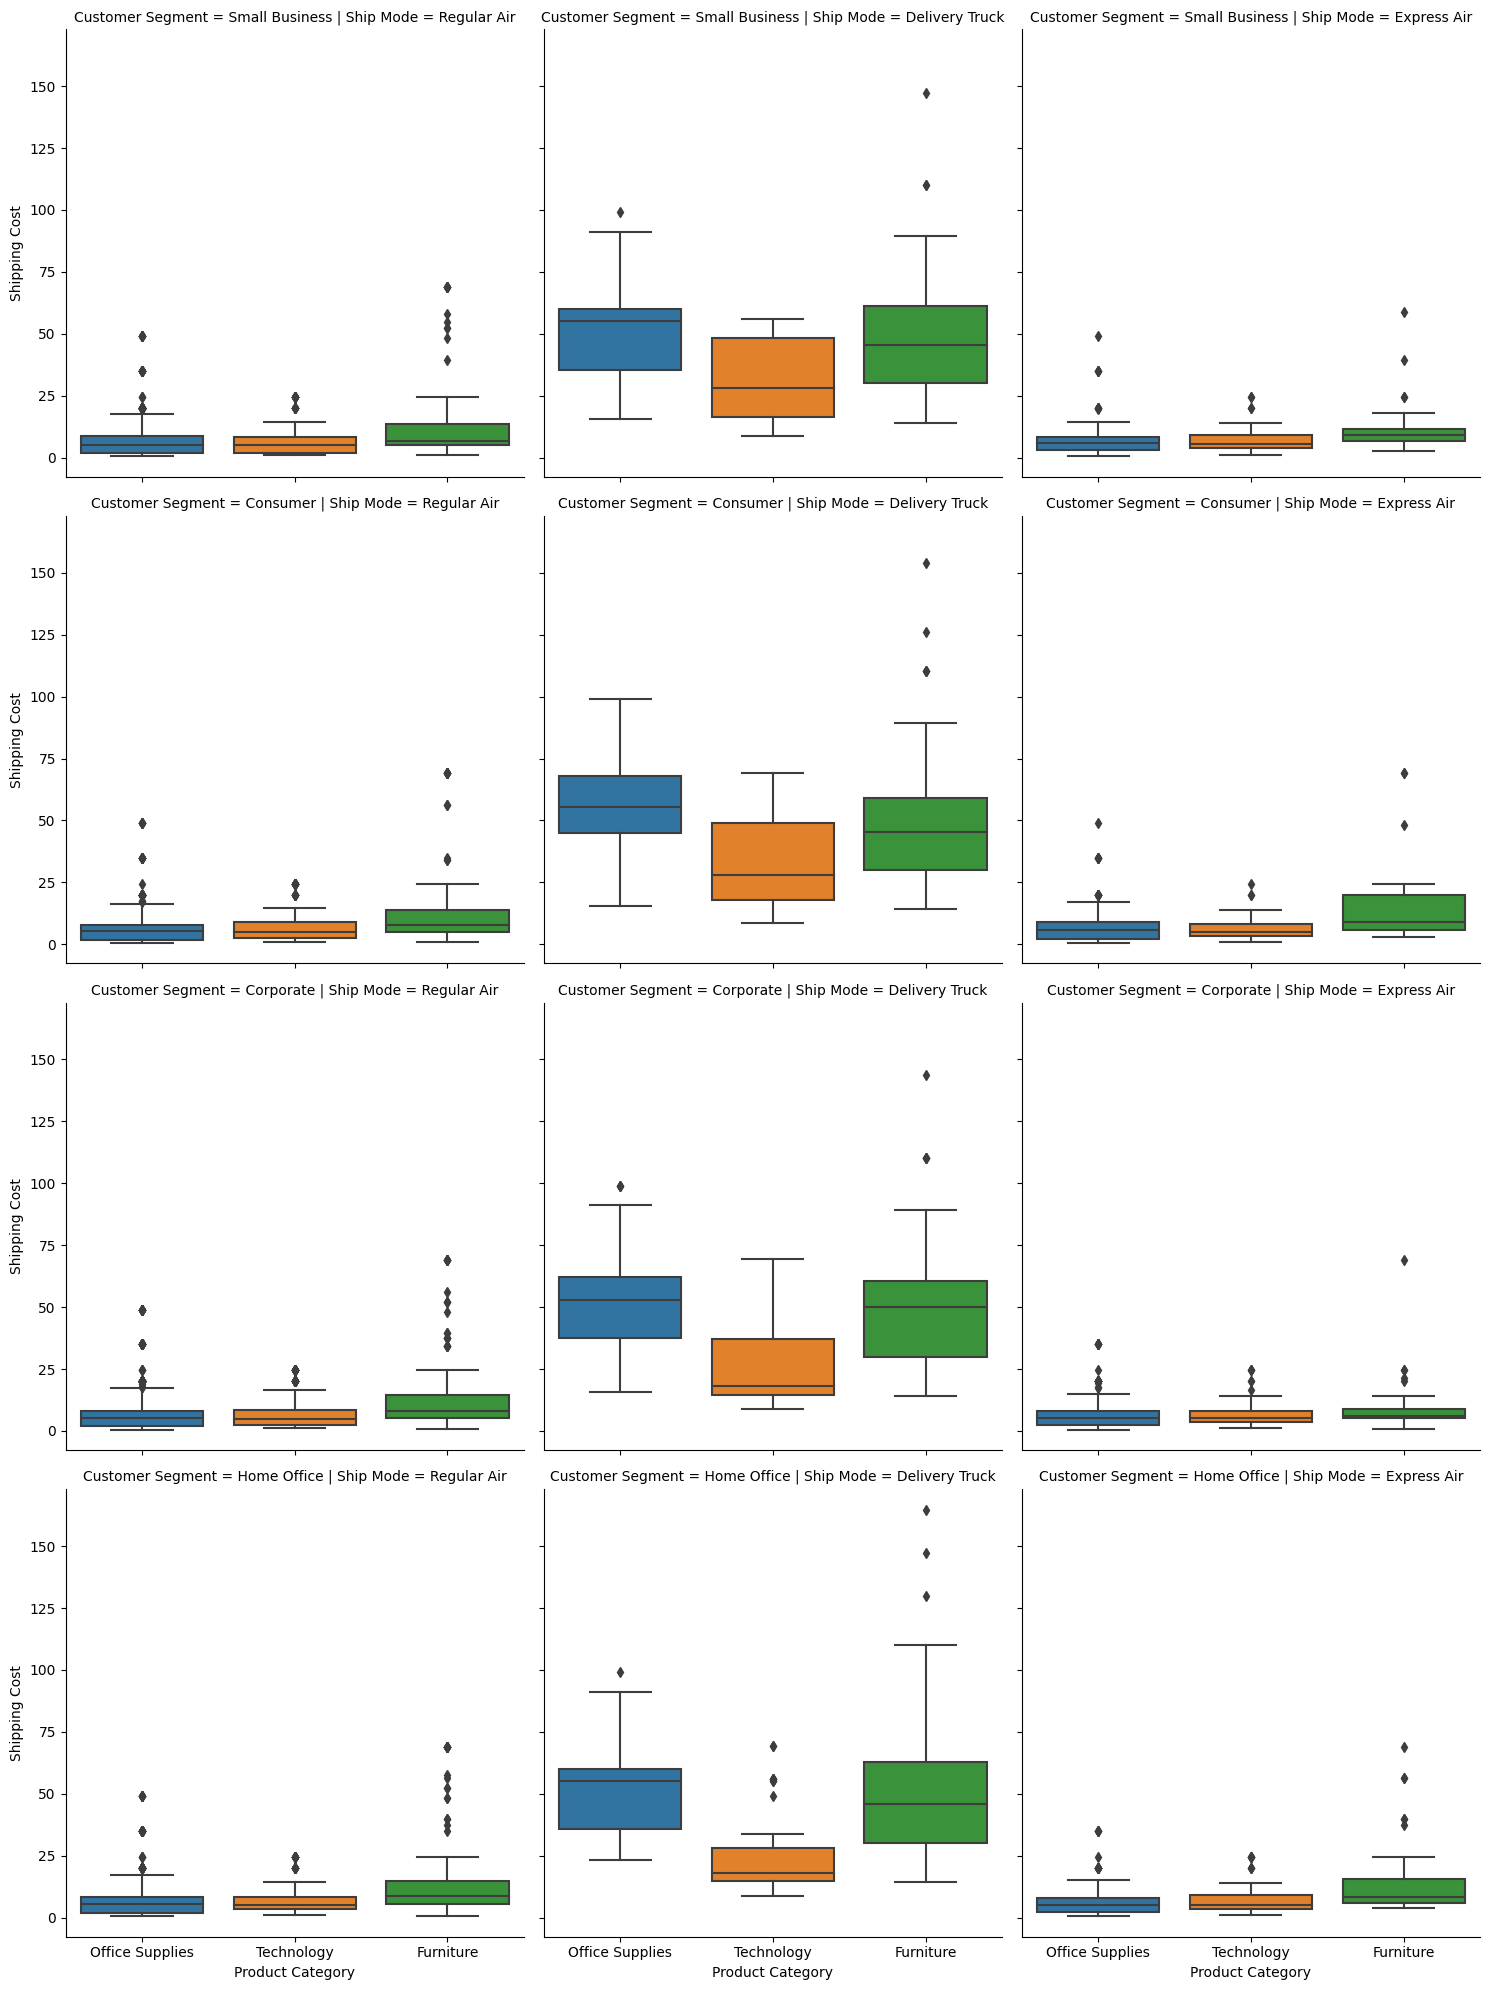

In [27]:
#col與row一起顯示
sns.catplot(x="Product Category",y="Shipping Cost",col="Ship Mode",row="Customer Segment",data=sales,kind="box")

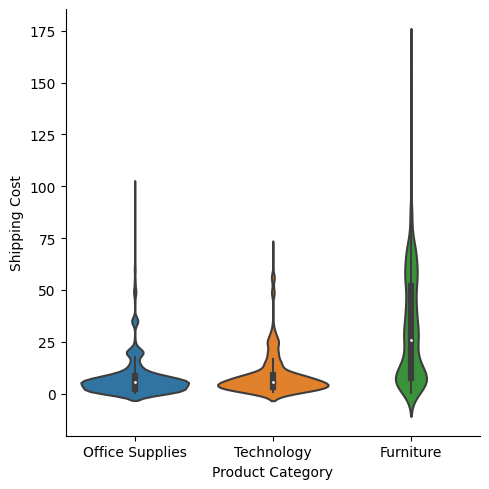

In [28]:
#顯示小提琴圖
sns.catplot(x="Product Category",y="Shipping Cost",data=sales,kind="violin")

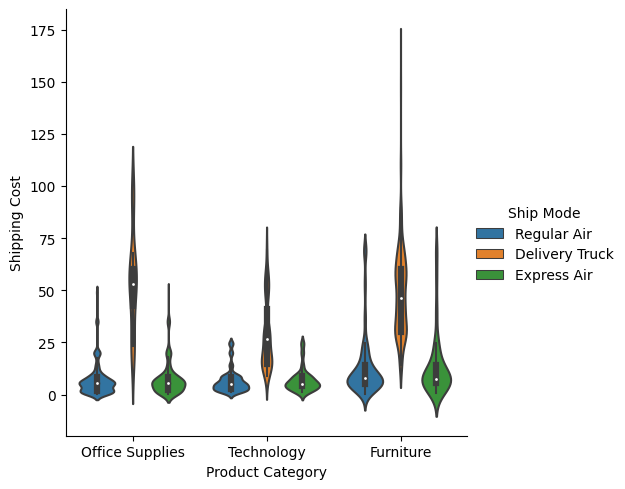

In [29]:
sns.catplot(x="Product Category",y="Shipping Cost",hue="Ship Mode",data=sales,kind="violin")

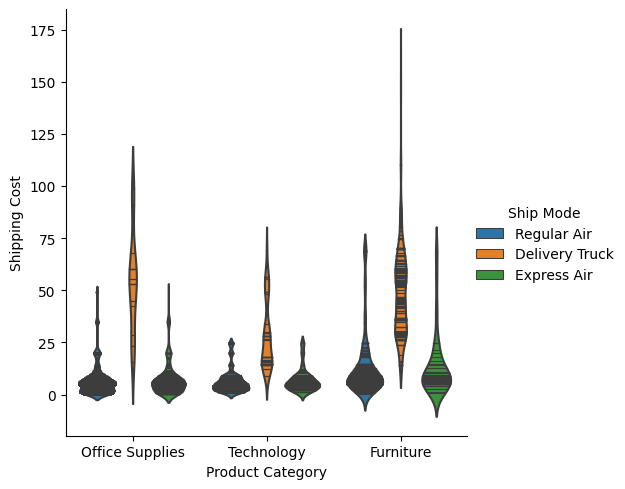

In [30]:
#於小提琴圖內顯示資料分布，用線條顯示
sns.catplot(x="Product Category",y="Shipping Cost",hue="Ship Mode",inner="stick",data=sales,kind="violin")

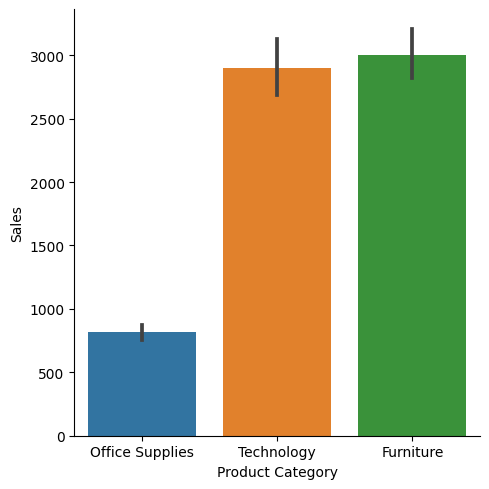

In [31]:
#用bar顯示圖表 (可加ci參數選擇信賴區間)
sns.catplot(x="Product Category",y="Sales",data=sales,kind="bar")

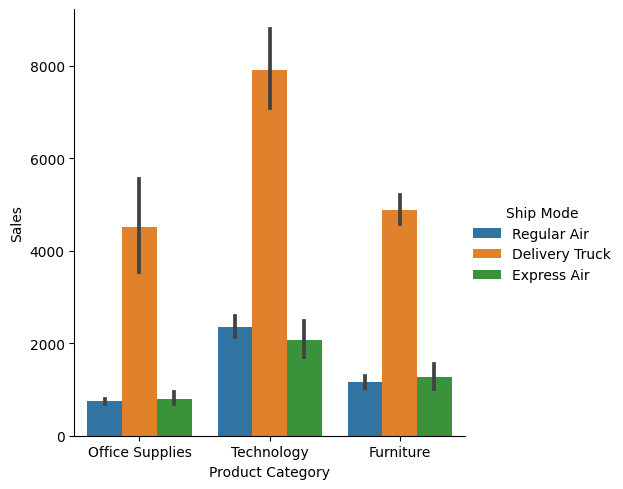

In [32]:
sns.catplot(x="Product Category",y="Sales",hue="Ship Mode",data=sales,kind="bar")

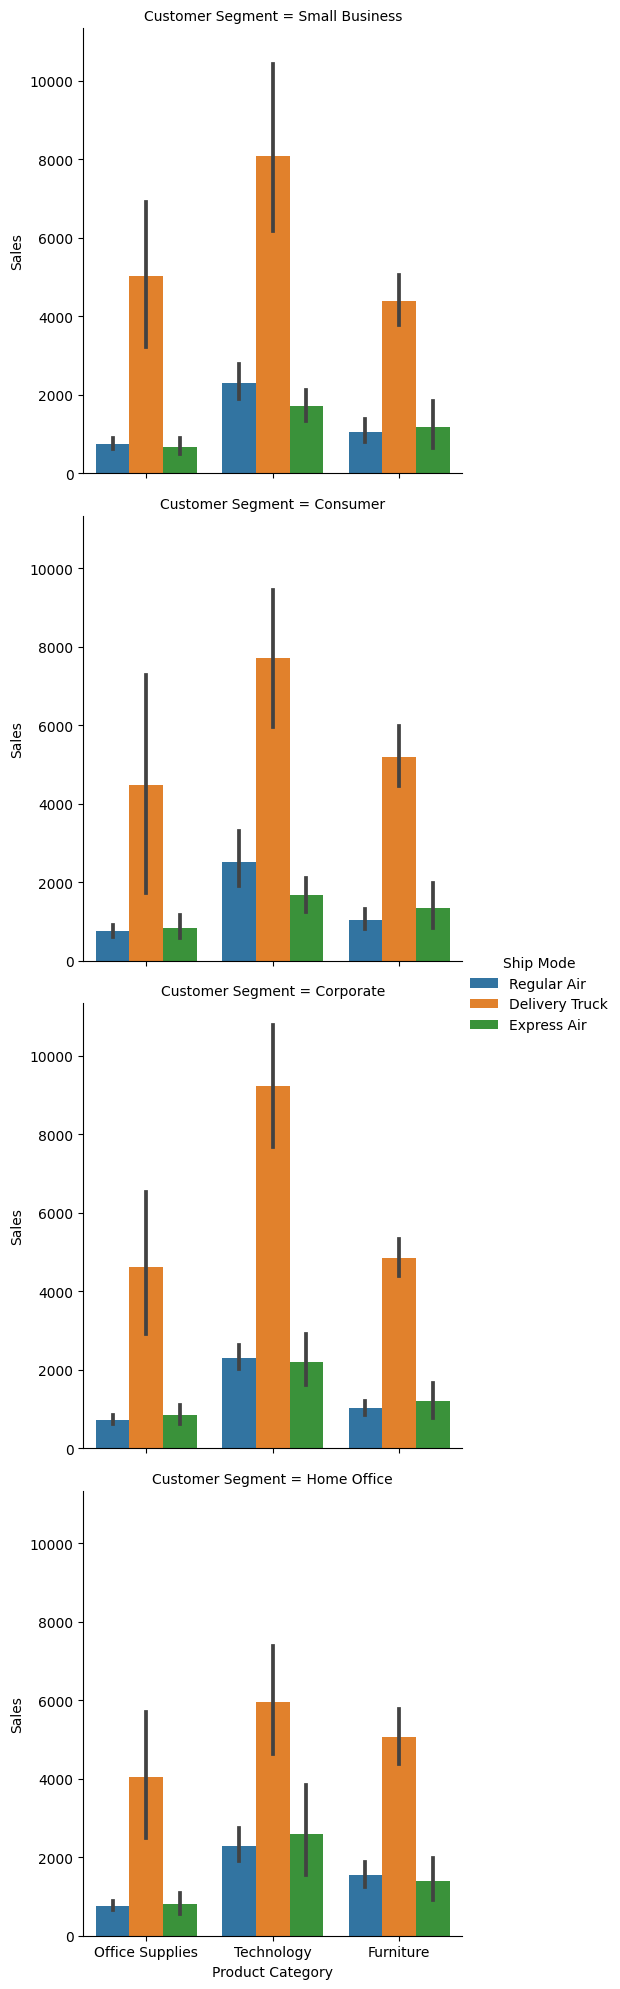

In [33]:
sns.catplot(x="Product Category",y="Sales",hue="Ship Mode",row="Customer Segment",data=sales,kind="bar")

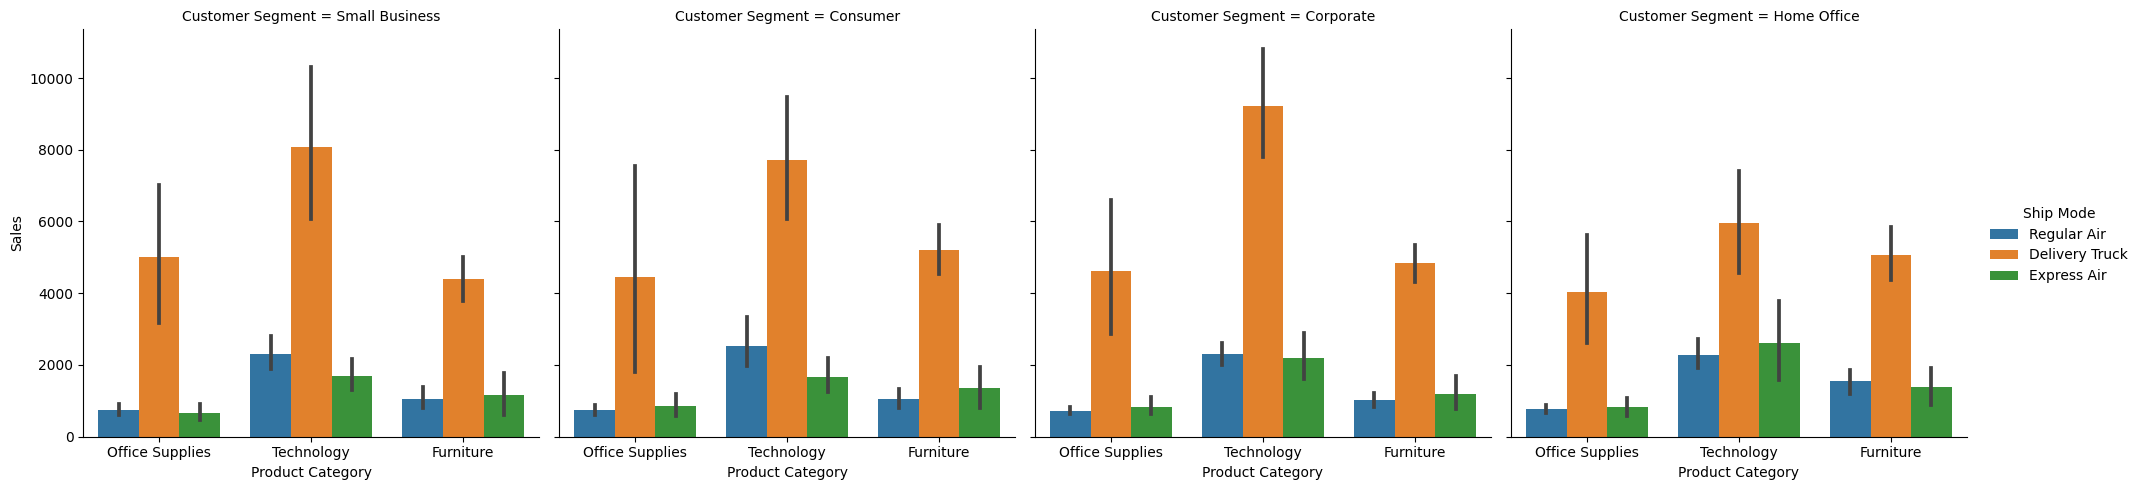

In [34]:
sns.catplot(x="Product Category",y="Sales",hue="Ship Mode",col="Customer Segment",data=sales,kind="bar")

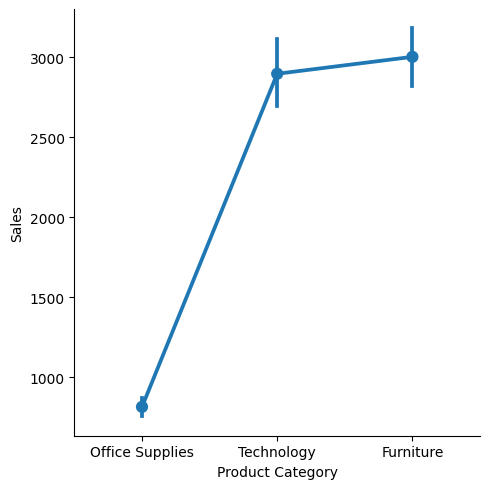

In [35]:
sns.catplot(x="Product Category",y="Sales",data=sales,kind="point")

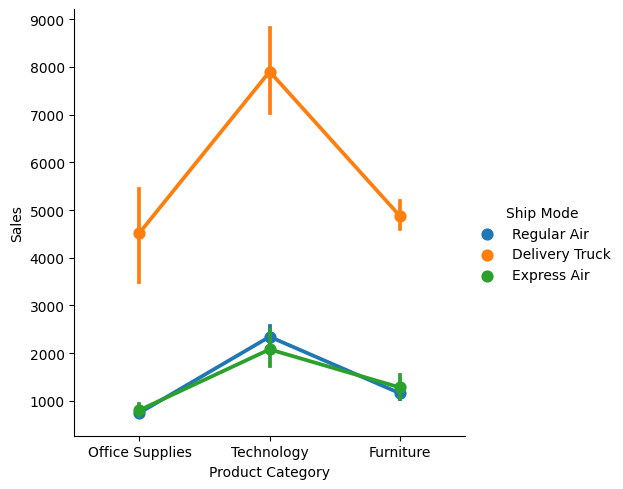

In [36]:
sns.catplot(x="Product Category",y="Sales",hue="Ship Mode",data=sales,kind="point")

### displot

C:\Users\orozc\AppData\Local\Temp\ipykernel_7416\2019478743.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales.Sales)


<AxesSubplot: xlabel='Sales', ylabel='Density'>

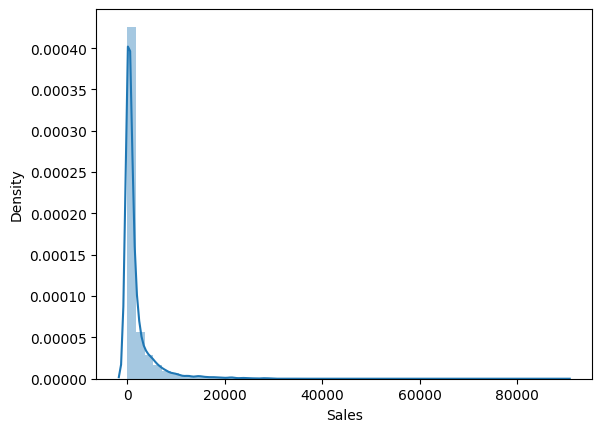

In [37]:
sns.distplot(sales.Sales)

C:\Users\orozc\AppData\Local\Temp\ipykernel_7416\1488048768.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales.Sales,rug=True)


<AxesSubplot: xlabel='Sales', ylabel='Density'>

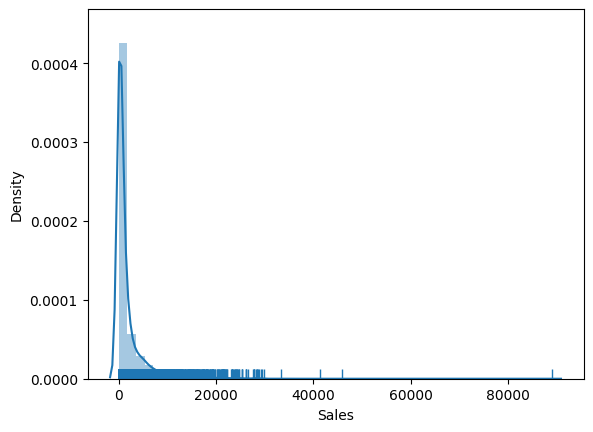

In [38]:
#rug表示於x軸顯示數量分布
sns.distplot(sales.Sales,rug=True)

C:\Users\orozc\AppData\Local\Temp\ipykernel_7416\2269384576.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales.Sales[(sales.Region=='West') & (sales.Profit>0)],rug=True)


<AxesSubplot: xlabel='Sales', ylabel='Density'>

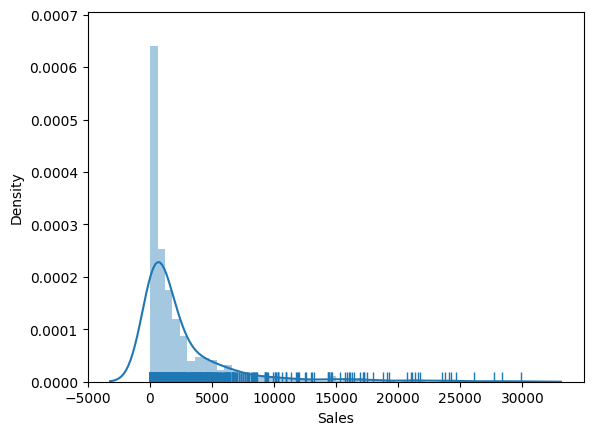

In [39]:
#多條件篩選
sns.distplot(sales.Sales[(sales.Region=='West') & (sales.Profit>0)],rug=True)

### jointplot

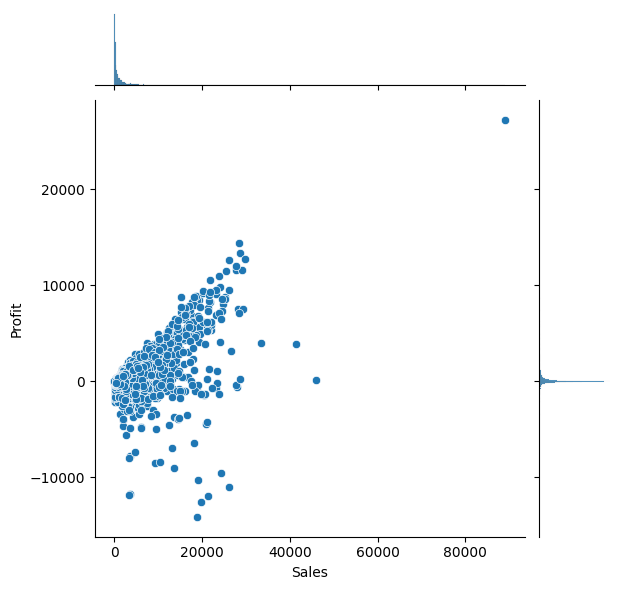

In [40]:
sns.jointplot(x="Sales",y="Profit",data=sales)

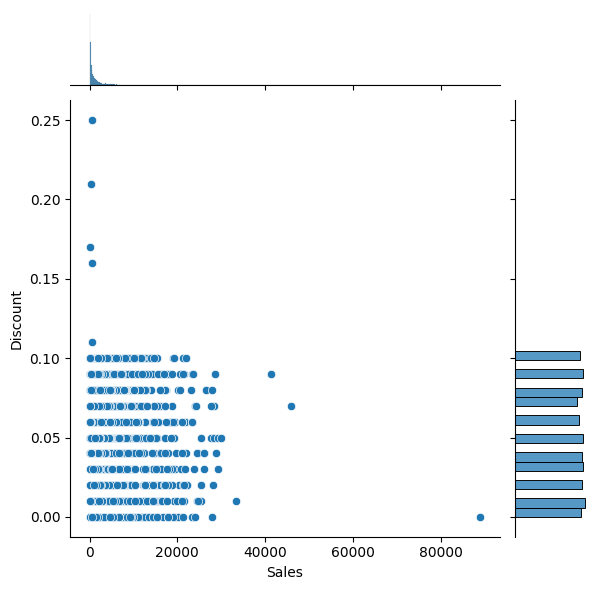

In [41]:
sns.jointplot(x="Sales",y="Discount",data=sales)

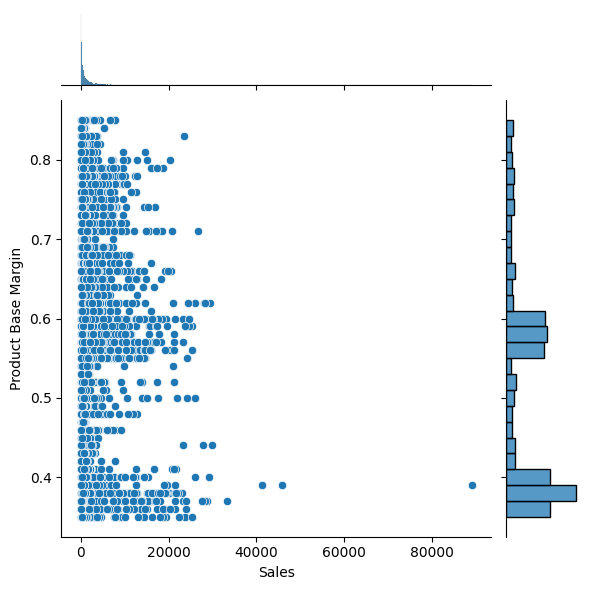

In [42]:
sns.jointplot(x="Sales",y="Product Base Margin",data=sales)

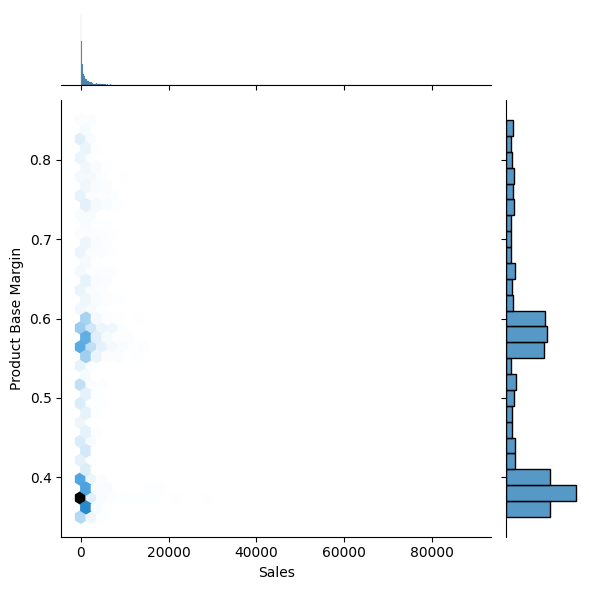

In [43]:
#利用kind為hex進行Product Base Margin顏色深淺分析
sns.jointplot(x="Sales",y="Product Base Margin",data=sales,kind='hex')

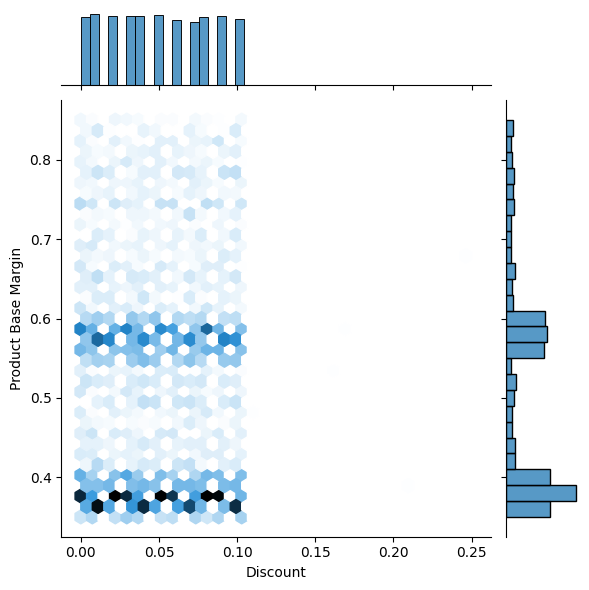

In [44]:
sns.jointplot(x="Discount",y="Product Base Margin",data=sales,kind='hex')

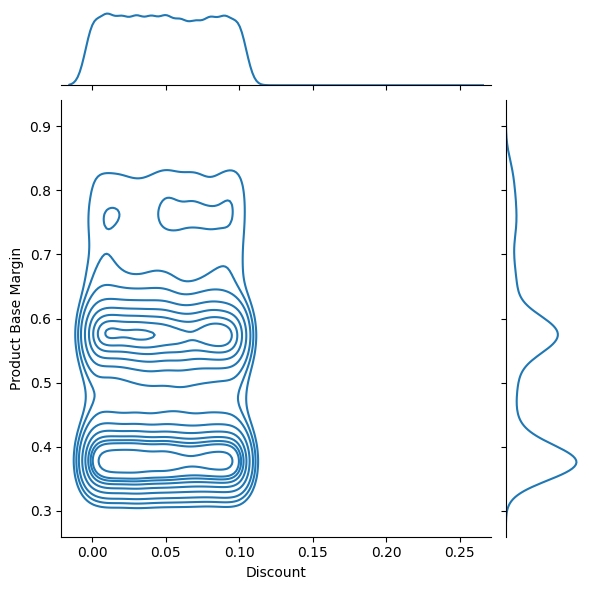

In [45]:
#透過kind為kde(核密度分顯示)
sns.jointplot(x="Discount",y="Product Base Margin",data=sales,kind='kde')